For this assignment, we were given a dataset originally from the National Institute of Diabetes and Digestive and Kidney Diseases. In particular, the patients in this dataset are all women who are at least 21 years old. The dataset consists of several medical predictor variables and one target variable, "Outcome."

The tasks of this assignment were to perform exploratory analysis, train 5 machine learning models on the dataset, and to calculate the confusion matrix for each model.

In [2]:
!pip install pydotplus
!pip install graphviz

In [3]:
!pip install shap

     |████████████████████████████████| 266kB 4.8MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376838 sha256=4b5b962a4af88df291d403eff802085d07c393212d46b705e13bb011ee301189
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [4]:
# import stuff up here
# link from class:
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

import numpy as np
import pandas as pd
import sklearn
import matplotlib
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, confusion_matrix, auc, average_precision_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [5]:
# loading the dataset
# kaggle link: https://www.kaggle.com/alhassanabdelglil/predicting-the-diabetes/data

url = 'https://raw.githubusercontent.com/sarahyurick/datasets/master/diabetes.csv'
dataset = pd.read_csv(url)
train_data, test_data = train_test_split(dataset, test_size=0.2)
print(len(train_data), 'train examples')
print(len(test_data), 'test examples')
x_train = train_data.iloc[:,:8]
y_train = train_data.iloc[:,-1]
x_test = test_data.iloc[:,:8]
y_test = test_data.iloc[:,-1]

614 train examples
154 test examples


Alright, now that we've loaded the data and split it into training and testing sets, it's time to do some EDA!!! Let's first look into some of the basic attributes.


In [0]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Do we have any missing variables? *crosses fingers*

In [0]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

Nice! Alright, it's time for some actual visualizations! Let's plot the ranges for each attributes.

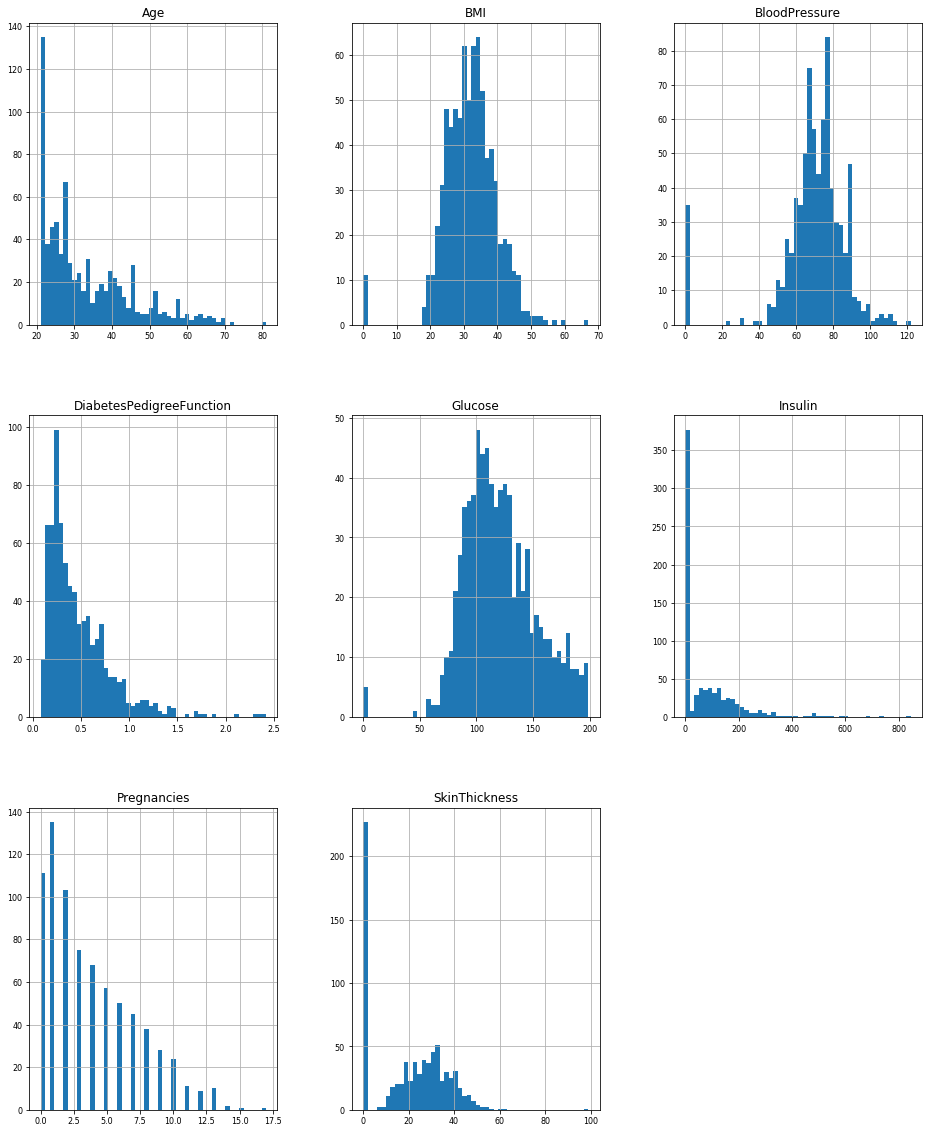

In [0]:
# Exploratory analysis
ds_num = dataset[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
ds_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

Are any of the attributes correlated?

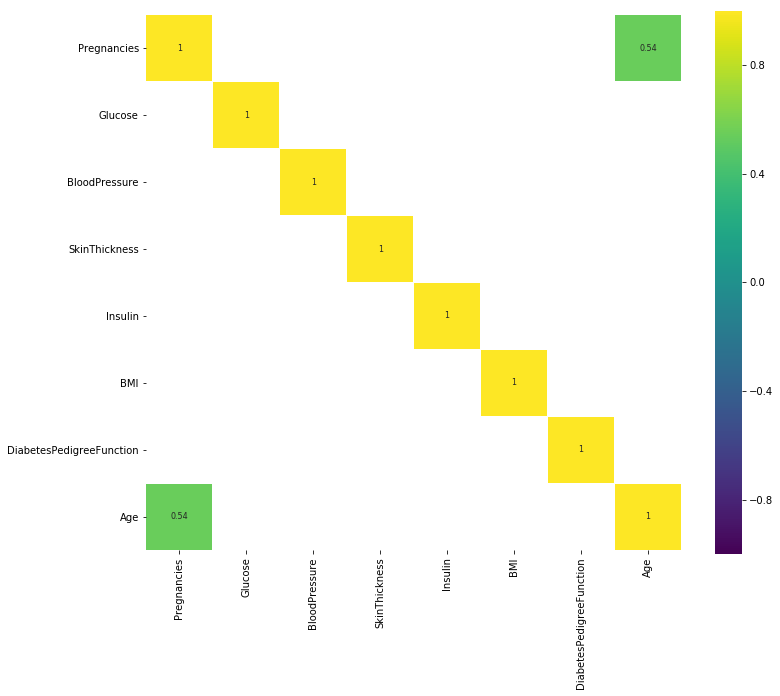

In [0]:
corr = ds_num.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [0]:
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


Whoa, pretty much no correlation between any of the attributes except "Age" and "Pregnancies"! Okay, one more visualization before we start training some models :)

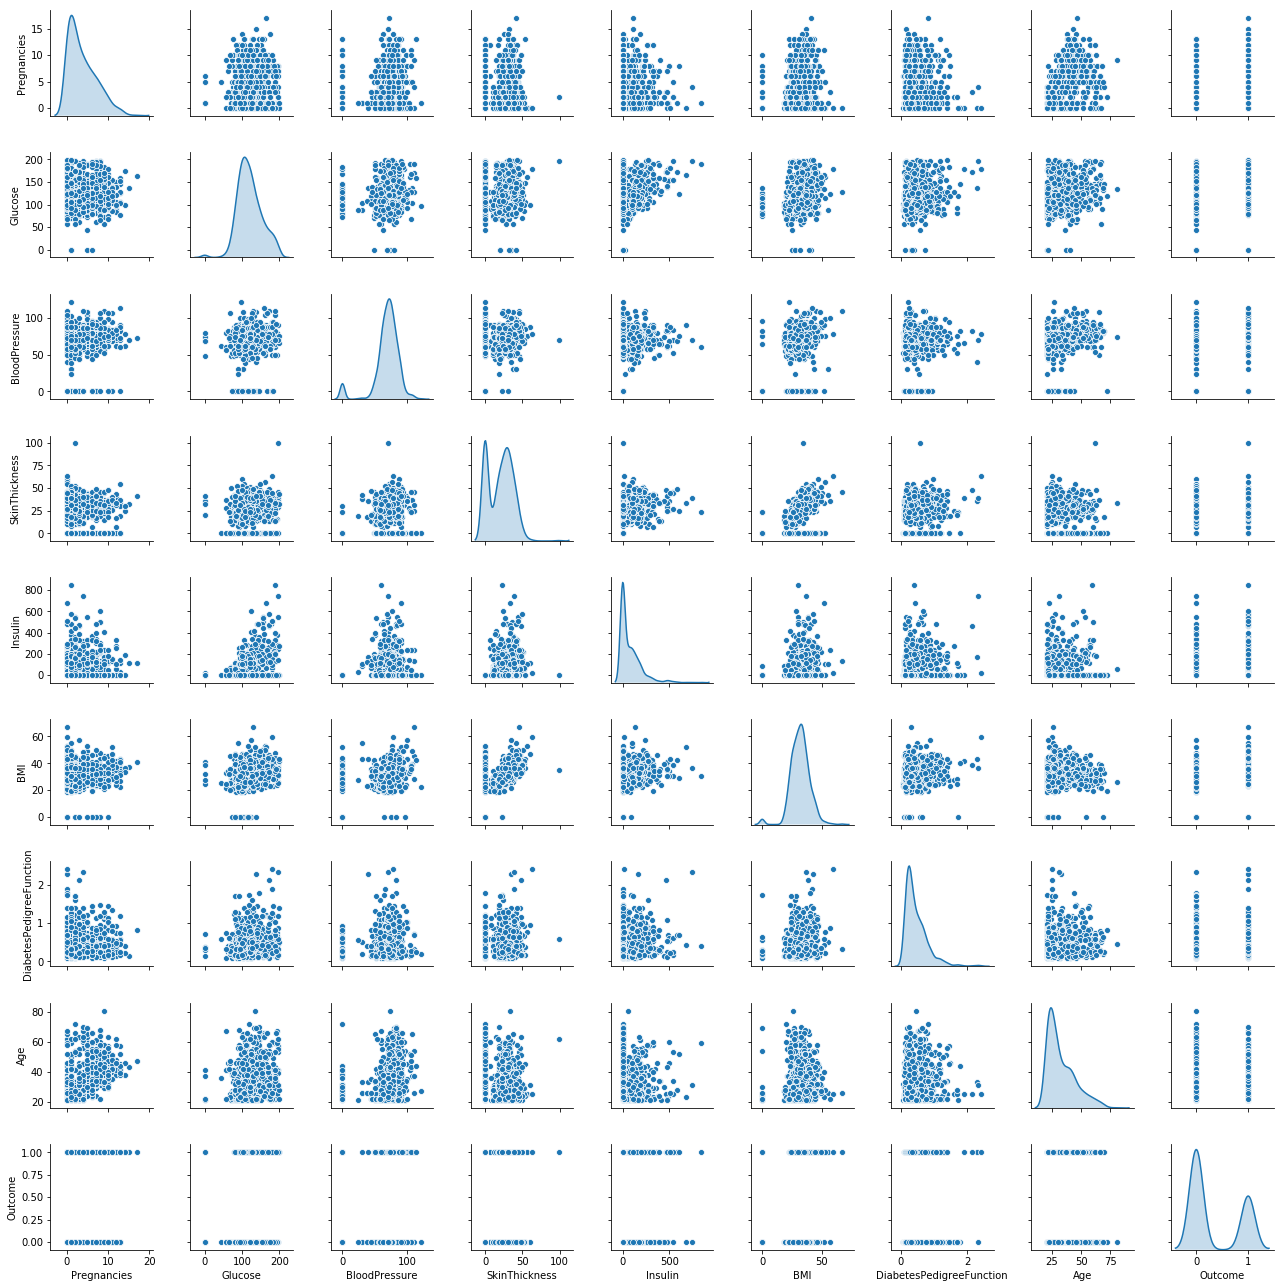

In [0]:
sns.pairplot(data=dataset, height=2, diag_kind='kde');

Philip decided to do a nice Random Forest Classifier...

In [6]:
# Machine learning model 1 - Philip
#Random Forest Classification with feature importance using SHAP

clf = RandomForestClassifier(n_estimators=200, random_state=0)

clf.fit(x_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
shap.initjs()
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values[0,:], x_train.iloc[0,:])

TypeError: ignored

And here's the resulting confusion matrix.

[[86 17]
 [17 34]]
ROC AUC: 0.819
PR AUC: 0.718
Train Accuracy: 1.000
Accuracy: 0.779


[<matplotlib.lines.Line2D at 0x7f841967cf60>]

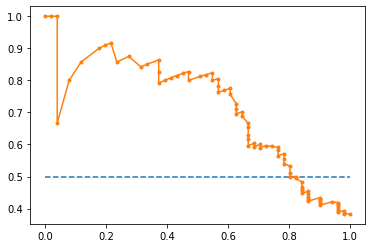

In [9]:
# Confusion matrix for model 1
pred = clf.predict(x_test)
matrix = sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)

probs = clf.predict_proba(x_test)
probs = probs[:,1]

rf_fpr, rf_tpr, thresholds = roc_curve(y_test, probs)
precision, recall, thresholds = precision_recall_curve(y_test, probs)

pr_auc = auc(recall, precision)
rf_roc_auc = roc_auc_score(y_test, probs)
print('ROC AUC: %.3f' % rf_roc_auc)
print('PR AUC: %.3f' % pr_auc)

print('Train Accuracy: %.3f' % clf.score(x_train, y_train))
print('Accuracy: %.3f' % clf.score(x_test, y_test))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker=".")



Sarah did some nice old-fashioned Logistic Regression...

In [0]:
# Machine learning model 2 - Sarah
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

And calculated the confusion matrix to be:

[[92 11]
 [23 28]]
ROC AUC: 0.843
PR AUC: 0.722
F1 SCORE: 0.622


[<matplotlib.lines.Line2D at 0x7fc2095326d8>]

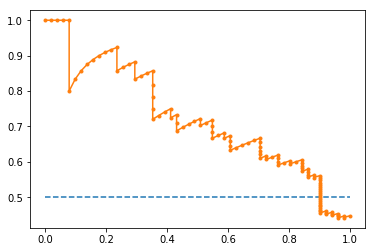

In [0]:
# Confusion matrix for model 2
pred = clf.predict(x_test)
matrix = sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)

probs = clf.predict_proba(x_test)
probs = probs[:,1]

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, probs)
precision, recall, thresholds = precision_recall_curve(y_test, probs)

pr_auc = auc(recall, precision)
lr_roc_auc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, pred)
print('ROC AUC: %.3f' % lr_roc_auc)
print('PR AUC: %.3f' % pr_auc)
print('F1 SCORE: %.3f' % f1)

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker=".")



Hope used a Gaussian Naive Bayes classifier!

In [0]:
# Machine learning model 3 - Hope
clf=GaussianNB()
clf.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

And the resulting confusion matrix...

[[88 15]
 [24 27]]
ROC AUC: 0.820
PR AUC: 0.617
F1 SCORE: 0.581


[<matplotlib.lines.Line2D at 0x7fc2098d5208>]

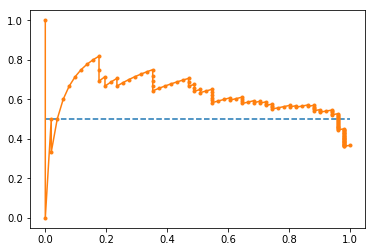

In [0]:
# Confusion matrix for model 3
pred = clf.predict(x_test)
matrix = sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)

probs = clf.predict_proba(x_test)
probs = probs[:,1]

gnb_fpr, gnb_tpr, thresholds = roc_curve(y_test, probs)
precision, recall, thresholds = precision_recall_curve(y_test, probs)

pr_auc = auc(recall, precision)
gnb_roc_auc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, pred)
print('ROC AUC: %.3f' % gnb_roc_auc)
print('PR AUC: %.3f' % pr_auc)
print('F1 SCORE: %.3f' % f1)

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker=".")

Now it's time for a Decision Tree classifier.

Accuracy of the Decision Tree Classifier Model: 0.7012987012987013


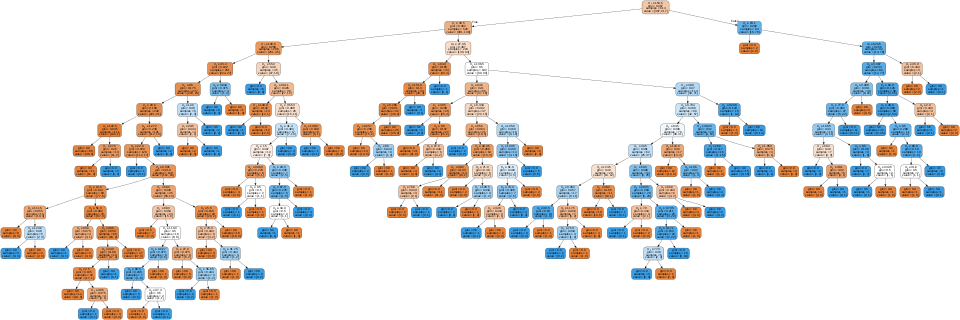

In [0]:

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(x_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Evaluation
print("Accuracy of the Decision Tree Classifier Model:", metrics.accuracy_score(y_test, y_pred))

# Visualizing the decision trees
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision tree.png')
graph.set_size('"10,10"')
Image(graph.create_png())

[[78 25]
 [21 30]]
ROC AUC: 0.673
PR AUC: 0.635
F1 SCORE: 0.566


[<matplotlib.lines.Line2D at 0x7fc209c70278>]

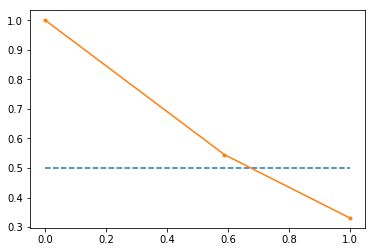

In [0]:
# confusion matrix for model 4
pred = clf.predict(x_test)
matrix = sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)

probs = clf.predict_proba(x_test)
probs = probs[:,1]

lr_fpr, lr_tpr, thresholds = roc_curve(y_test, probs)
precision, recall, thresholds = precision_recall_curve(y_test, probs)

pr_auc = auc(recall, precision)
lr_roc_auc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, pred)
print('ROC AUC: %.3f' % lr_roc_auc)
print('PR AUC: %.3f' % pr_auc)
print('F1 SCORE: %.3f' % f1)

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker=".")

In [0]:
# optimization of model 4
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467


[[95  8]
 [31 20]]
ROC AUC: 0.801
PR AUC: 0.598
F1 SCORE: 0.506
Accuracy: 0.747


[<matplotlib.lines.Line2D at 0x7fc209de3400>]

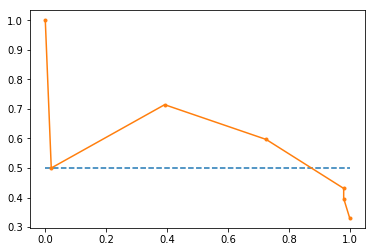

In [0]:
# Confusion matrix of model 4 after optimization
pred = clf.predict(x_test)
matrix = sklearn.metrics.confusion_matrix(y_test, pred)
print(matrix)

probs = clf.predict_proba(x_test)
probs = probs[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, probs)
precision, recall, thresholds = precision_recall_curve(y_test, probs)

pr_auc = auc(recall, precision)
dt_roc_auc = roc_auc_score(y_test, probs)
f1 = f1_score(y_test, pred)
print('ROC AUC: %.3f' % dt_roc_auc)
print('PR AUC: %.3f' % pr_auc)
print('F1 SCORE: %.3f' % f1)
print('Accuracy: %.3f' % clf.score(x_test, y_test))

plt.plot([0,1],[0.5,0.5], linestyle='--')
plt.plot(recall, precision, marker=".")

# **Machine Learning Model 5: Gradient Boosted Classification Tree (Ryan)**

## Intro and Pre-Processing

  For this machine learning model, used a gradient boosted classification tree (GBCT) to predict the presence of diabetes in the Kaggle dataset. To begin, I will modify the train-test procedure completed above since I noticed a modest amount of class imbalance, as can be seen by the following count plot:

In [0]:
sns.countplot(dataset['Outcome']);

NameError: ignored

To resolve this issue, I will utilize the built-in stratification feature in scikit-learn ```train_test_split()``` method. In doing so, the train and test sets will contain equal amounts of the outcome classes. Resolving class imbalance is very important for improving the ability of the algorithm to correctly classify the data.


In [0]:
dataset_np = dataset.to_numpy().transpose()

X = dataset_np[:-1].transpose()
y = dataset_np[-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, stratify=y)

To confirm this procedure worked, let's do a quick calculation to confirm the class proportions have been established correctly.

In [0]:
f'The class proportion in the train set is {sum(y_train == 0)/sum(y_train == 1)}.'

In [0]:
f'The class proportion in the test set is {sum(y_test == 0)/sum(y_test == 1)}.'

## Building the Model, Training, and Testing

Now that the training and testing sets have been appropriately created, let's begin by designing how the model will be built. For this analysis, there will be the primary comparison of scaling vs not scaling.

To begin the classifier, the exponential loss was chosen over the deviance loss function because it improved the confusion matrix. Similarly, the scoring and refit metrics were specified because they resulted in CV score that was consistently above the 77% score in using the accuracy metric.

scikit-learn's ```GridSearchCV``` method was used to consider various hyperparameter values that can be changed when using the GBCT algorithm. ```n_iter_no_change``` is the number of iterations in which the validation score is not improving. In other words, this is an early stopping criteria, and sets aside a certain amount of the training set (default value of 0.1 used) for validation. ```learning_rate``` is shrinkage parameter that determines how significantly the model updates its parameters at each iteration. ```subsample``` is the proportion of the training set that is sampled at each iteration (without replacement) to grow the next tree. Finally, ```n_estimators``` is the number of boosting stages to perform.

For scaling, the ```RobustScaler``` was used as it is less prone to outlier influence.

For a very detailed discussion of this algorithm and many others, I highly recommend *The Elements of Statistical of Learning* (Hastie, Tibshirani, and Friedman) and *Applied Predictive Modeling* (Kuhn and Johnson).

In [0]:
gbrt_no_scaling = GradientBoostingClassifier(loss='exponential')
unscaled_pipeline = Pipeline(steps=[('no_scale_grad_boost', gbrt_no_scaling)])
unscaled_params = {
    'no_scale_grad_boost__n_iter_no_change':[None, 5, 10, 20],
    'no_scale_grad_boost__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'no_scale_grad_boost__subsample': [0.25, 0.5, 0.75, 1],
    'no_scale_grad_boost__n_estimators': [50, 100, 150, 200], 
}

grid_cv_no_scaling = GridSearchCV(
    estimator=unscaled_pipeline,
    param_grid=unscaled_params,
    scoring=['roc_auc', 'balanced_accuracy'],
    refit='roc_auc',
    cv=5,
    iid=False)

grid_cv_no_scaling.fit(X_train, y_train)

no_scaling_cv_results = {
    'best_cv_score':grid_cv_no_scaling.best_score_, 
    'best_params_':grid_cv_no_scaling.best_params_}

gbrt_scaled = GradientBoostingClassifier(loss='exponential')
rs = RobustScaler()
scaled_pipeline = Pipeline(steps=[('robust_scaler', rs),('grad_boost', gbrt_scaled)])
    
scaled_params = {
    'grad_boost__n_iter_no_change':[None, 5, 10, 20],
    'grad_boost__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'grad_boost__subsample': [0.25, 0.5, 0.75, 1],
    'grad_boost__n_estimators': [50, 100, 150, 200], 
}

grid_cv_scaled = GridSearchCV(
    estimator=scaled_pipeline,
    param_grid=scaled_params,
    cv=5,
    scoring=['roc_auc', 'balanced_accuracy'],
    refit='roc_auc',
    iid=False)

grid_cv_scaled.fit(X_train, y_train)

scaled_cv_results = {
    'best_cv_score':grid_cv_scaled.best_score_, 
    'best_params_':grid_cv_scaled.best_params_}

Now that the best model has been selected, let's observe its confusion matrix to get a better understanding of its robustness.

In [0]:
y_pred_unscaled = grid_cv_no_scaling.predict(X_test)
y_pred_scaled = grid_cv_scaled.predict(X_test)

In [0]:
scaled_cv_results

In [0]:
no_scaling_cv_results

In [0]:
cf_scaled = confusion_matrix(y_test, y_pred_scaled)
cf_unscaled = confusion_matrix(y_test, y_pred_unscaled)

f, axes = plt.subplots(figsize=(8,8))
sns.heatmap(cf_unscaled/cf_unscaled.sum(),annot=True,cmap='Blues')
axes.set(title='Confusion Matrix (Unscaled Features)');
sns.set_context("paper", font_scale=2)

In [0]:
f, axes = plt.subplots(figsize=(8,8))
sns.heatmap(cf_scaled/cf_scaled.sum(),annot=True,cmap='Blues')
axes.set(title='Confusion Matrix (scaled Features)');
sns.set_context("paper", font_scale=2)

Notice that the model built with scaled features does slightly better at detecting TP.

In [0]:
gbct_probs = grid_cv_scaled.predict_proba(X_test)
gbct_probs = gbct_probs[:,1]

gbct_fpr, gbct_tpr, thresholds = roc_curve(y_test, gbct_probs)
gbct_roc_auc_scaled = roc_auc_score(y_test, y_pred_scaled)
gbct_roc_auc_unscaled = roc_auc_score(y_test, y_pred_unscaled)
precision, recall, thresholds = precision_recall_curve(y_test, gbct_probs)

f, axes = plt.subplots(figsize=(12,8))
sns.lineplot(x=gbct_fpr, y=gbct_tpr, ax=axes)
sns.lineplot(x=rf_fpr, y=rf_tpr, ax=axes)
sns.lineplot(x=lr_fpr, y=lr_tpr, ax=axes)
sns.lineplot(x=gnb_fpr, y=gnb_tpr, ax=axes)
sns.lineplot(x=dt_fpr, y=dt_tpr, ax=axes)
baseline_x = np.linspace(0,1,100)
baseline_y = np.linspace(0,1,100)
sns.lineplot(x=baseline_x, y=baseline_y, ax=axes)
axes.legend([f'Gradient boosted tree (AUC={round(gbct_roc_auc_scaled, 3)})',
           f'Random forest (AUC={round(rf_roc_auc, 3)})', 
           f'Logistic regression (AUC={round(lr_roc_auc, 3)})',
           f'Gaussian naive Bayes (AUC={round(gnb_roc_auc, 3)})',
            f'Decision Tree (AUC={round(dt_roc_auc, 3)})',
            f'Baseline'])
axes.set(xlabel='1 - Specifcity (FPR)', ylabel='Sensitivity (TPR)', title='ROC Curves for All ML Models');
sns.set_context("paper", font_scale=2)

As can be seen by the ROC curve above, random forest and logistic regression have practically the same AUC scores, while Gaussian naive Bayes has a slighlty lower score. Curiously, the gradient boosted tree (with scaled features) performs the worst out of the models, despite using ```GridSearchCV``` to tune its hyperparamters. Moreover, the AUC using non-scaled features performed better than the scaled version:

In [0]:
print('Gradient boosted tree (scaled):', gbct_roc_auc_scaled)
print('Gradient boosted tree (non-scaled):', gbct_roc_auc_unscaled)

From this analysis, it appears that random forest is the top performer. However, do to its computational complexity, logistic regression may be the preferred model to use on future data.